# Quadcopter-learned-flying




- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  



In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]



The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

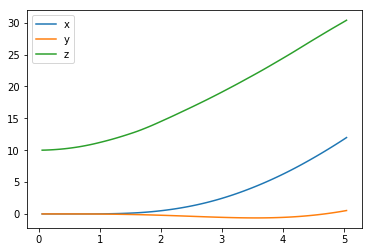

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

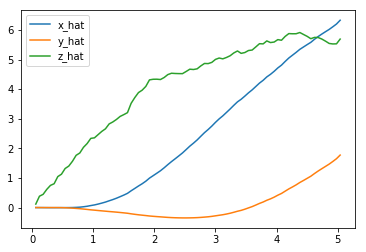

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

 the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

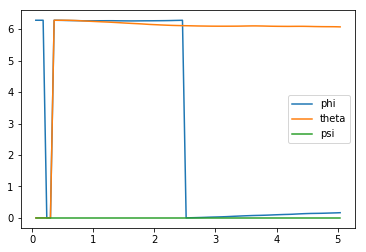

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

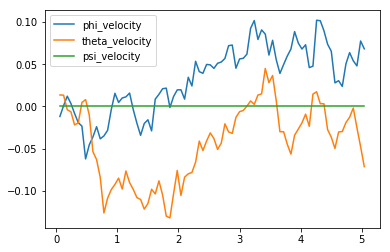

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

the agent's choice of actions.  

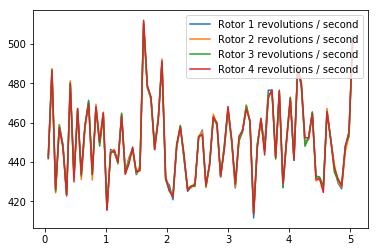

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()


- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[11.98280964  0.53370575 30.38968887  0.16569954  6.07219316  0.        ]
[6.32823414 1.77324431 5.69178148]
[ 0.06829814 -0.07122762  0.        ]




## The Task


- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.


The `reset()` method resets the simulator. 
The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`. 



## The Agent



In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.146 (best =   0.123), noise_scale = 3.2625

This agent should perform very poorly on this task.  

In [16]:
## agent
import numpy as np
import sys
from agents.agent import Agent
from task import Task
 


# Take off task
num_episodes = 200
init_pos = np.array([0., 0., 1., 0., 0., 1.])
# target of height 
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=init_pos, target_pos=target_pos,runtime=10.)
agent = Agent(task)

rewards = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    step = 0
    while True:
        step +=1
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            rewards.append(agent.score)
            print("\r\nEpisode ={:4d}, score={:7.3f} (best={:7.3f}) pos={} {} {}".format(
                i_episode,
                agent.score,
                agent.best_score,
                round(task.sim.pose[:3][0],2),
                round(task.sim.pose[:3][1],2),
                round(task.sim.pose[:3][2],2)), end="")  # [debug]
            break
           
    sys.stdout.flush()




Episode =   1, score=2435.723 (best=2435.723) pos=0.0 -0.0 0.0
Episode =   2, score=2435.723 (best=2435.723) pos=0.0 -0.0 0.0
Episode =   3, score=2435.723 (best=2435.723) pos=0.0 -0.0 0.0
Episode =   4, score=2435.723 (best=2435.723) pos=0.0 -0.0 0.0
Episode =   5, score=2435.679 (best=2435.723) pos=-0.0 0.0 0.0
Episode =   6, score=2435.695 (best=2435.723) pos=0.0 0.0 0.0
Episode =   7, score=2435.682 (best=2435.723) pos=0.0 0.0 0.0
Episode =   8, score=2435.700 (best=2435.723) pos=0.0 0.0 0.0
Episode =   9, score=2435.702 (best=2435.723) pos=-0.0 0.0 0.0
Episode =  10, score=2435.705 (best=2435.723) pos=-0.0 -0.0 0.0
Episode =  11, score=2535.707 (best=2535.707) pos=-0.0 -0.0 0.0
Episode =  12, score=2535.707 (best=2535.707) pos=-0.0 -0.0 0.0
Episode =  13, score=2535.707 (best=2535.707) pos=-0.0 -0.0 0.0
Episode =  14, score=2535.707 (best=2535.707) pos=-0.0 -0.0 0.0
Episode =  15, score=2535.707 (best=2535.707) pos=-0.0 -0.0 0.0
Episode =  16, score=2535.707 (best=2535.707) pos=-

## Plot the Rewards



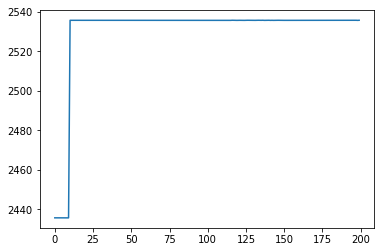

In [17]:
##  Plot the rewards.



plt.plot(rewards, label='rewards')



I designed "take off" that should be vertical until some height which is mentioned in target position. For that i tried to implement sum of eular angles, distance from target and constant reward is given for each step of flight. target height (Z-axis value) to reach is 10 units above the ground. I Build a mechanism which save the total rewards obtained in each episode.



The algorithm used is based on the suggested DDPG alogrithm. I tried different nsizes, but after observing that more complex network did not add much value I decided not to change the network architecture.I have used provided code for actor, critic and ddpg agent and did some updation in values.


After trying different neural network layer sizes,i finalize the theta=0.15, mu = 0, sigma=0.001, gamma=0.99 and tau=0.1.

NN for actor: 3 dense layer with (sizes: 64, 64, 32) with ReLU activation, followed by the final dense layer with sigmoid activation. 

NN for critic: 2 hidden layer with (sizes: 64, 32) with ReLU activation. In last combined finally single output layer with ReLU activation. This layer is connected to a dense layer with the output Q values. I have used a learning rate of 0.001.





I think the task of flying a quadcopter is hard because it needs a good coordination of 4 different actions. I faced lots of challenges in deciding overall reward and the timing of the transition from one to another task. A lot of iterations done for finding optimal values. The learning curve in my scenario was worse. The final performance of my agent was not good in my case, I need to improve my parameters with good reward policy.


#### Update: i implemented my reward function properly now i am getting good results as per above. i added extra reward for flying near to target is 100 and for constant flying 10.



For me take off part implementation is hardest part of this project. It took several days to me figure out the constraints and the model required for implementing the takeoff task. Another thing is reward function I still can't figure out optimal reward function. I tried many penalty tearms for velocity, euler angles but it is difficult for me.  I couldn't change this behavior by any amount of change in the hyper parameters or reward amount. RL is very confusing for me, I find everything interesting about quadcopter and my agent, it maxes out its z in the negative direction and goes into the ground!!!


#### Update: As per my 1st submission i was getting negetive values (Best ~ -6) but after implementing reward function correctly i am getting positive values (best ~ 2535) which is achivement for me.